Read CSV data for subjects 32 and 33 of the Ninapro dataset
The data includes the EMG signals from 12 channels, the repetition and the labels of the 17 exersizes. 

In [1]:
import os
import pandas as pd

# Function to read CSV files and store data in dictionaries
def read_csv_files(directory):
    data_dictionaries = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            # Extracting information from filename
            file_prefix = filename[:3]
            file_suffix = filename[-7:-4]  # Extracting last three characters before the extension
            
            # Creating dictionary name based on file suffix
            dict_name = file_suffix.lower()
            if dict_name not in data_dictionaries:
                data_dictionaries[dict_name] = {}
            
            # Reading CSV file into a pandas DataFrame
            df = pd.read_csv(os.path.join(directory, filename))
            
            # Using first three characters of filename as keys
            key = file_prefix
            
            # Storing DataFrame in the dictionary
            data_dictionaries[dict_name][key] = df
            
    return data_dictionaries

# Example usage:
directory = os.getcwd()
data_dir=os.path.join(current_dir, 'data')

result = read_csv_files(data_dir cvfg gfrv)

# Accessing data from dictionaries
for dict_name, data_dict in result.items():
    print(f"Dictionary: {dict_name}")
    for key, df in data_dict.items():
        print(f"Key: {key}")
        print(df)  # Printing DataFrame for demonstration


Dictionary: emg
Key: S32
         -2.947948e-06  -4.008128e-06  -1.516559e-06  -1.389906e-06  \
0        -6.304963e-06  -4.343657e-06      -0.000001  -2.061381e-06   
1        -6.137145e-06  -4.007788e-06      -0.000003  -1.390060e-06   
2        -2.948039e-06  -2.664826e-06      -0.000003  -8.865894e-07   
3         7.321677e-08   6.923300e-07      -0.000004  -2.229460e-06   
4         1.751678e-06   4.553032e-06      -0.000006  -2.229536e-06   
...                ...            ...            ...            ...   
1768431  -4.510275e-06  -3.944995e-05      -0.000005  -1.409242e-06   
1768432  -1.320947e-06  -4.196733e-05      -0.000004  -2.416247e-06   
1768433   5.255878e-07  -3.508516e-05      -0.000005  -2.248309e-06   
1768434   2.223217e-08  -2.367105e-05      -0.000005  -7.375767e-07   
1768435  -6.489735e-07  -1.628532e-05      -0.000003  -1.408886e-06   

         3.984377e-07  -2.952968e-06  -2.07127e-06  -1.462549e-06  \
0       -1.049836e-07  -1.442317e-06 -2.071565e-06  -

Crop the samples and save them in a dictionary. Each sample is indexed by the subject number, the label of the exersize and the repetition number. The code is generalizable for more subjects 

In [2]:
def create_sample_matrices(data):
    sample_matrices = {}  # Dictionary to store sample matrices

    # Iterate through subjects
    for subject, emg_data in data['emg'].items():
        stimulus_data = data['lus'][subject]  # Get stimulus data for the subject
        repetition_data = data['ion'][subject]  # Get repetition data for the subject
        unique_labels = list(range(1,18)) # 17 excersizes

        # Initialize dictionary for the subject
        sample_matrices[subject] = {}

        # Iterate through unique stimulus labels
        for label in unique_labels:
            # Find indices where the label occurs in stimulus_data
            indices = [i for i in range(len(stimulus_data.values)) if stimulus_data.values[i] == label]

            # Extract samples from emg_data based on the indices
            samples = emg_data.iloc[indices,:] 
            print("excersize=",label)
            # Divide each sample into sub-samples based on repetition data
            sub_samples = []
            for rep in range(1,7):  # Iterate over each repetition number
                # Find indices where the repetition label occurs
                rep_indices = [i for i in list(indices) if repetition_data.values[i] == rep]
                # Select rows corresponding to the repetition indices
                sub_sample = emg_data.iloc[rep_indices,:]
                sub_samples.append(sub_sample)
                print("rep=",rep)
                

            # Store the sub-samples in the dictionary with label as key
            sample_matrices[subject][label] = sub_samples

    return sample_matrices

# Example usage
sample_matrices = create_sample_matrices(result)

# Accessing data from the sample_matrices dictionary
# Example: Accessing sub-samples with label 1 for subject 'S32'
sub_samples_S32_label_1 = sample_matrices['S32'][1]


excersize= 1
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 2
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 3
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 4
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 5
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 6
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 7
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 8
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 9
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 10
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 11
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 12
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 13
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 14
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 15
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 16
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6
excersize= 17
rep= 1
rep= 2
rep= 3
rep= 4
rep= 5
rep= 6


Plot the raw signals from one subject, one trial and one exercise. 

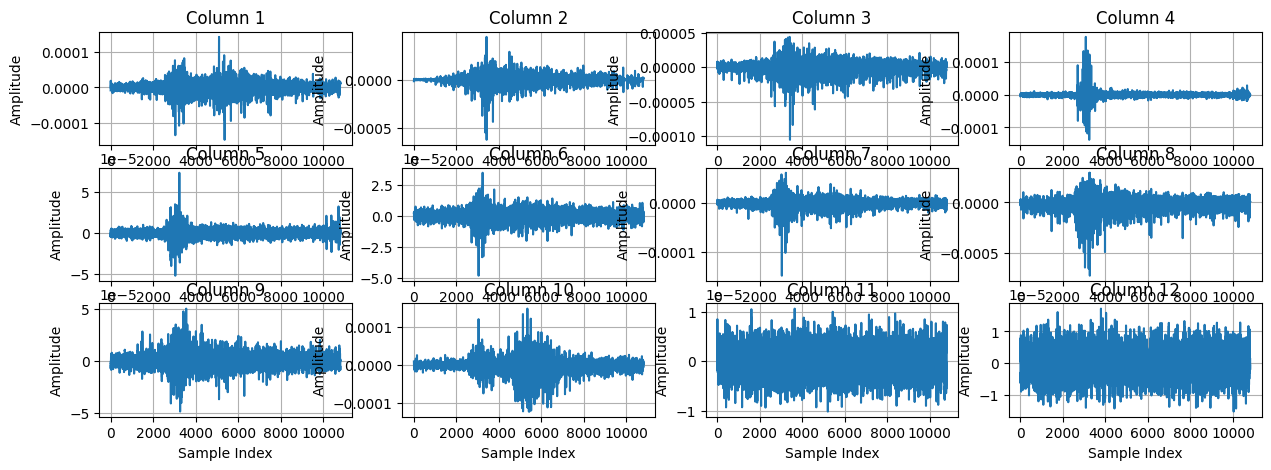

In [4]:
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Assuming sub_samples_S32_label_1 is a list of arrays
num_cols = 12

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=num_cols//3, figsize=(15, 5))

# Plot each column in a separate subplot
for i in range(num_cols):
    row_index = i // 4  # Calculate row index
    col_index = i % 4   # Calculate column index
    axes[row_index, col_index].plot(sub_samples_S32_label_1[1].values[:, i])  # Plot the i-th column
    axes[row_index, col_index].set_title(f'Column {i+1}')
    axes[row_index, col_index].set_xlabel('Sample Index')
    axes[row_index, col_index].set_ylabel('Amplitude')
    axes[row_index, col_index].grid(True)


Filter the data to remove noise and unwanted frequencies 

In [5]:
# save a copy of the raw data
sample_matrices_unfiltered = sample_matrices;

# Filter the data
sample_matrices_filtered = {}
for subject, subject_data in sample_matrices_unfiltered.items():
    sample_matrices_filtered[subject] = {}
    for label, samples_list in subject_data.items():
        filtered_samples = [sample.rolling(window=3, axis=1,min_periods=1).mean() for sample in samples_list]
        sample_matrices_filtered[subject][label] = filtered_samples

C:\Users\mkhalil\AppData\Local\Temp\ipykernel_768\2058848237.py:24: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  filtered_samples = [sample.rolling(window=3, axis=1,min_periods=1).mean() for sample in samples_list]
C:\Users\mkhalil\AppData\Local\Temp\ipykernel_768\2058848237.py:24: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  filtered_samples = [sample.rolling(window=3, axis=1,min_periods=1).mean() for sample in samples_list]
C:\Users\mkhalil\AppData\Local\Temp\ipykernel_768\2058848237.py:24: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  filtered_samples = [sample.rolling(window=3, axis=1,min_periods=1).mean() for sample in samples_list]
C:\Users\mkhalil\AppData\Local\Temp\ipykernel_768\2058848237.

Plot the filtered signals 

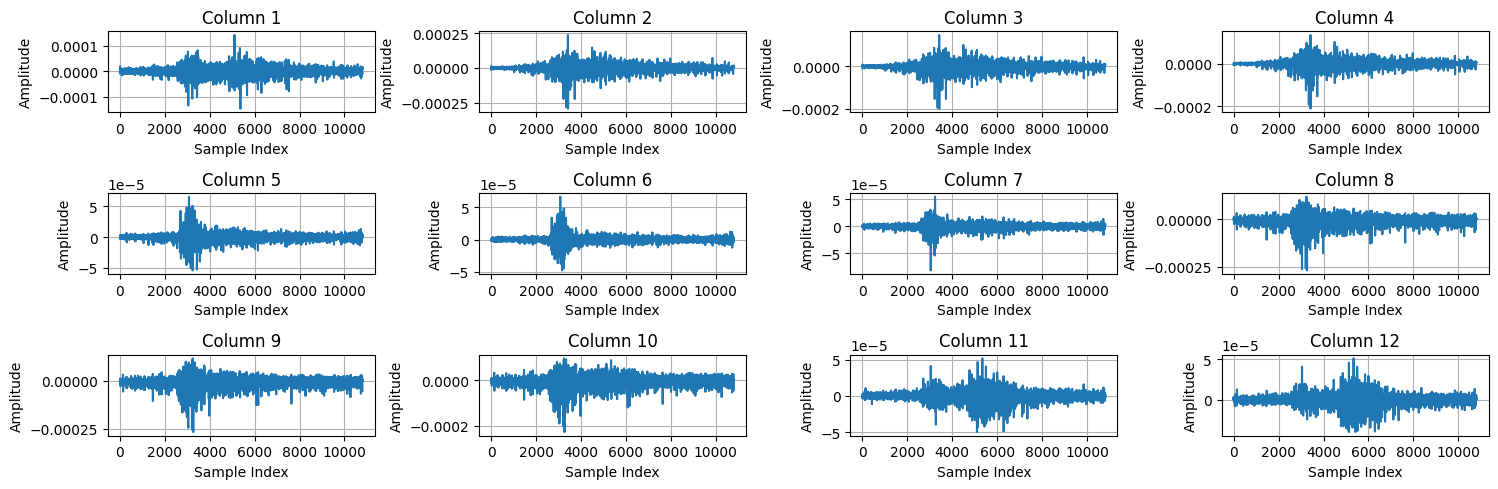

In [6]:
# Get the number of columns
num_cols = 12

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=num_cols//3, figsize=(15, 5))
smf=sample_matrices_filtered['S32'][1][1].values
# Plot each column in a separate subplot
for i in range(num_cols):
    row_index = i // 4  # Calculate row index
    col_index = i % 4   # Calculate column index
    axes[row_index, col_index].plot(smf[:, i])  # Plot the i-th column
    axes[row_index, col_index].set_title(f'Column {i+1}')
    axes[row_index, col_index].set_xlabel('Sample Index')
    axes[row_index, col_index].set_ylabel('Amplitude')
    axes[row_index, col_index].grid(True)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Find the PSD of each signal in each sample, cross-PSD of each pair of signals, the coherence value, and the degree of each EMG node for each exercise

In [30]:
from scipy.signal import welch
from scipy.signal import csd
import numpy as np
# find the cross PSD
# Dictionary to store cross PSDs
cross_psds = {}

# Loop through each subject
for subject, subject_data in sample_matrices_filtered.items():
    # Initialize dictionary for the subject
    cross_psds[subject] = {}
    degree={}
    # Loop through each label
    for label, samples_list in subject_data.items():
        # Initialize dictionary for the label
        cross_psds[subject][label] = {}
        degree[label]={}
        # Loop through each trial
        for trial_idx, sample in enumerate(samples_list):
            # Get the number of rows and columns in the sample
            num_rows, num_cols = sample.shape
            degree[label][trial_idx]=np.zeros((1,num_cols)) 
            # Initialize list to store cross PSDs for this trial
            cross_psds_trial = []
            sample=sample.values # cast a df to an array
            c_xy=np.zeros((num_cols,num_cols))  # Initialize coherence matrix
                      
            # Loop through each pair of columns
            for i in range(num_cols):
                for j in range(i+1, num_cols):
                     # Ensure both columns have the same length
                    min_len = min(len(sample[:, i]), len(sample[:, j]))
                    sample_i = sample[:min_len, i]
                    sample_j = sample[:min_len, j]
                    # Calculate the cross PSD using Welch's method
                    _, c_psd = csd(sample[:, i], sample[:, j], fs=2000, nperseg=256)
                    psd_x = welch(sample[:, i], fs=2000, axis=1, nperseg=256)[1] 
                    psd_y = welch(sample[:, j], fs=2000, axis=1, nperseg=256)[1] 
                    # calculate the coherence
                    multiply_psd=np.pad(psd_x * psd_y,(0, len(c_psd) - len(psd_x * psd_y)), mode='constant')
                    # avoid mult. by zero
                    nonzero_indices = multiply_psd != 0  # Find indices where denominator is nonzero

                    c_xy[i,j]=max(np.square(np.abs(c_psd[nonzero_indices])) /multiply_psd[nonzero_indices])
                    # FIND THE wcc 
                    
            # find the node degree
            degree[label][trial_idx]= (np.sum(c_xy) - np.trace(c_xy))/num_cols-1;
            
            

            

i= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 7
j= 8
j= 9
j= 10
j= 11
i= 8
j= 9
j= 10
j= 11
i= 9
j= 10
j= 11
i= 10
j= 11
i= 11
i= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 7
j= 8
j= 9
j= 10
j= 11
i= 8
j= 9
j= 10
j= 11
i= 9
j= 10
j= 11
i= 10
j= 11
i= 11
i= 0
j= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 1
j= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 2
j= 3
j= 4
j= 5
j= 6
j= 7
j= 8
j= 9
j= 10
j= 11
i= 

Plot the box and whisker plot of each node in the musclur network to view how the degree of coherence varies for each exercise. 

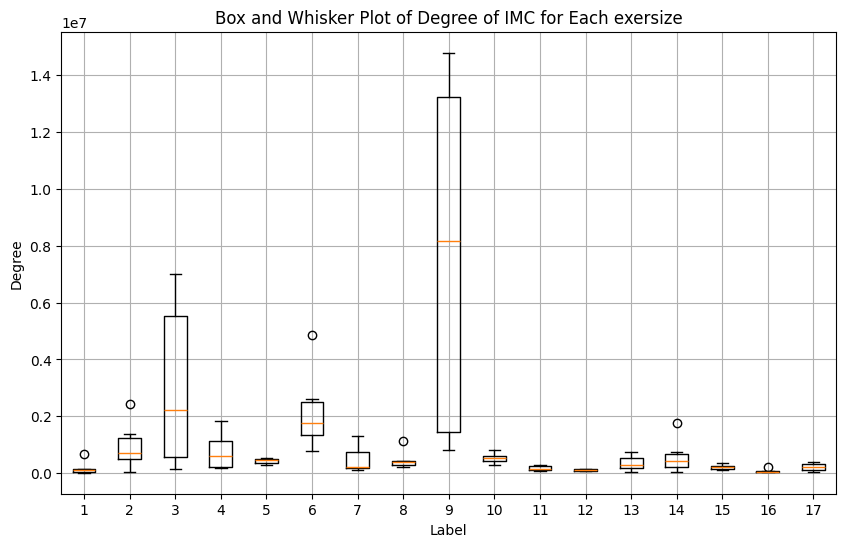

In [53]:
# plot the degree of each node 
degrees = np.zeros((6,17))

# Iterate over each label and trial
for label, trials in degree.items():
    degrees[:,label-1]=np.array(list(degree[label].values()))
  #  for trial_idx, values in trials.items():
      #  labels.append(label)

# Plot box and whisker plot
plt.figure(figsize=(10, 6))
plt.boxplot(degrees)
plt.xlabel('Label')
plt.ylabel('Degree')
plt.title('Box and Whisker Plot of Degree of IMC for Each exersize')
plt.grid(True)
plt.show()

Analyse the results statistically using the ANOVA test and the p-value. 
Note that, for the first five exercises, the null hypothesis can be rejected with (p<0.05)

In [63]:
from scipy import stats

# Perform ANOVA
f_stat, p_value = stats.f_oneway(degrees[:,0], degrees[:,1], degrees[:,2], degrees[:,3],degrees[:,4])

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 3.7633705322893523
P-value: 0.015738519435802324
